In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [24]:
transform =transforms.ToTensor()#here this clamps the value between 0 and 1 by dividing each pixel value by 255. But the distribution could be anything
mnist_data=datasets.MNIST(root='./data',train=True, download=True, transform=transform)#here only image is converted from PIL form to tensors not their label(label still is int)
print(mnist_data[0][0].shape)
train_loader=DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

torch.Size([1, 28, 28])


In [18]:
data_iterator_object=iter(train_loader)

In [19]:
images,labels=next(data_iterator_object)
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [45]:
class Autoencoder_linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,13),
            nn.ReLU(),
            nn.Linear(13,2)
        )
        self.decoder=nn.Sequential(
            nn.Linear(2,13),
            nn.ReLU(),
            nn.Linear(13,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        #flattened=self.flatten(x)
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

In [46]:
model=Autoencoder_linear()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [48]:
num_epochs=5
outputs=[]
for epoch in range(num_epochs):
    for (img, _) in train_loader :
        img=img.reshape(-1,28*28)
        x_reconstructed=model(img)
        loss=criterion(x_reconstructed,img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, x_reconstructed))

Epoch:1, Loss:0.0454
Epoch:2, Loss:0.0477
Epoch:3, Loss:0.0474
Epoch:4, Loss:0.0440
Epoch:5, Loss:0.0391


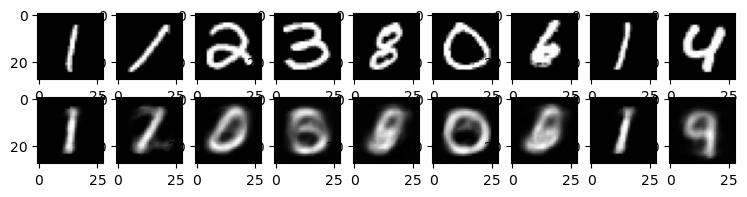

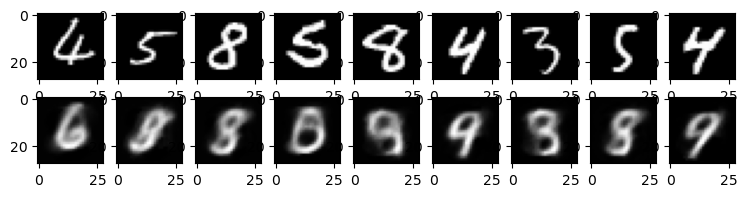

In [53]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy() #Since part of output ie img and x_reconstructed are within the computational graph their gradients are contantly being tracked. This occupies memory so detach it. furthermore numpy() can't be called on tensors with requires_grad=True
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) 
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) 
        # item: 1, 28, 28
        plt.imshow(item[0])#imshow doesn't accept tensors ie only numpy